---
title: "Example Notebooks of Poincare Map" \
author: "Naoya Ozaki" \
date: "04 January 2024" \
output: "poincare_map"

---

In [1]:
using LinearAlgebra

# Definition of Equation of Motion of Planar CRTBP
function eom_pcrtbp!(dx, x, μ, t)
    # Preparation
    r1 = x[1:2] + [μ, 0.0]
    r2 = x[1:2] - [1.0 - μ, 0.0]
    a_cori = [2.0x[4], -2.0x[3]]
    a_cf = [x[1], x[2]]
    # dx/dt
    dx[1:2] = x[3:4]
    dx[3:4] = -(1.0 - μ) * r1 / (norm(r1)^3) - μ * r2 / (norm(r2)^3) + a_cori + a_cf
end

eom_pcrtbp! (generic function with 1 method)

In [2]:
function condition(x, t, integrator) # Event when event_f(u,t) == 0
    r1_vec = x[1:2] + [μ,0]
    return r1_vec ⋅ x[3:4]
end

function affect!(integrator)
    nothing
end

affect! (generic function with 1 method)

In [3]:
using DifferentialEquations
cb = ContinuousCallback(condition, nothing, affect!, save_positions=(true, false))

jacobi_constant = 3.0
μ = 5.667e-5 #0.01215058426994
qx0 = 1.03 # 1.03 + 5.0e-3*random()
py0 = sqrt(-jacobi_constant + qx0^2 + 2.0 * (1.0 - μ) / abs(qx0 + μ) + 2.0 * μ / abs(qx0 - 1.0 + μ) + μ*(1.0-μ))
x0 = [qx0, 0.0, 0.0, py0]
tspan = (0.0, 1000.0)
prob = ODEProblem(eom_pcrtbp!, x0, tspan, μ)
sol = solve(prob, Vern7(), callback=cb, saveat=[-1000.0,0.0,1000.0])

retcode: Success
Interpolation: 1st order linear
t: 100-element Vector{Float64}:
    0.0
    5.109371624206108
   15.202010291784552
   25.292839027341714
   35.38222533212644
   45.4731203175569
   55.63842468982875
   65.87573310757756
   76.11195462831357
   86.33159196213677
    ⋮
  927.0238433183488
  937.5579927321492
  947.878361590983
  957.8935845157205
  967.907463656114
  977.9237173135969
  987.941552802231
  997.9119991411707
 1000.0
u: 100-element Vector{Vector{Float64}}:
 [1.03, 0.0, 0.0, 0.07910913786663287]
 [-0.5405846793908287, -1.6193684991868713, -0.9885625905799635, 0.3299716954558137]
 [1.4272149620768568, 0.938007030157569, 0.5728467026977065, -0.8716436252635047]
 [-1.7012310970290097, 0.1468573136855449, 0.08967360191166554, 1.0387663680022832]
 [1.2464245731558619, -1.1669124630741714, -0.7124195020522415, -0.7609975680841746]
 [-0.2603075708390296, 1.6869039506012593, 1.0295319530631197, 0.15883335748413124]
 [-0.9505954099160709, -1.4483376042964697, -0.898

In [4]:
x_all = hcat(sol.u...)'

r_1 = sqrt.((x_all[:, 1] .+ μ) .^ 2 + x_all[:, 2] .^ 2)
k_ene = 0.5 * ((x_all[:, 3] - x_all[:, 2]) .^ 2 + (x_all[:, 4] + x_all[:, 1] .+ μ) .^ 2)
a = -0.5 ./ (k_ene .- 1 ./ r_1)
theta = atan.(x_all[:, 2],x_all[:, 1] .+ μ)
# v_r = x_all[:, 3].*cos.(theta) + x_all[:,4].*sin.(theta)
# v_t = r_1 - x_all[:, 3] .* sin.(theta) + x_all[:, 4] .* cos.(theta)
# a = (r_1.*(1-μ))./(2*(1-μ) .- r_1.*(v_r.^2+v_t.^2))

100-element Vector{Float64}:
  0.0
 -1.8929572681641653
  0.5814221043074769
  3.055479129276809
 -0.7524404374049716
  1.7238667555260425
 -2.1515851045541887
  0.17763118020781535
  2.5072207109743125
 -1.430858297114845
  ⋮
  0.1411667174687127
  2.173182399973167
 -1.8071141513047484
  0.744824568266344
 -2.987694078842812
 -0.43893118301718176
  2.1100483368093936
 -1.5750253036559392
 -2.7557724353389563

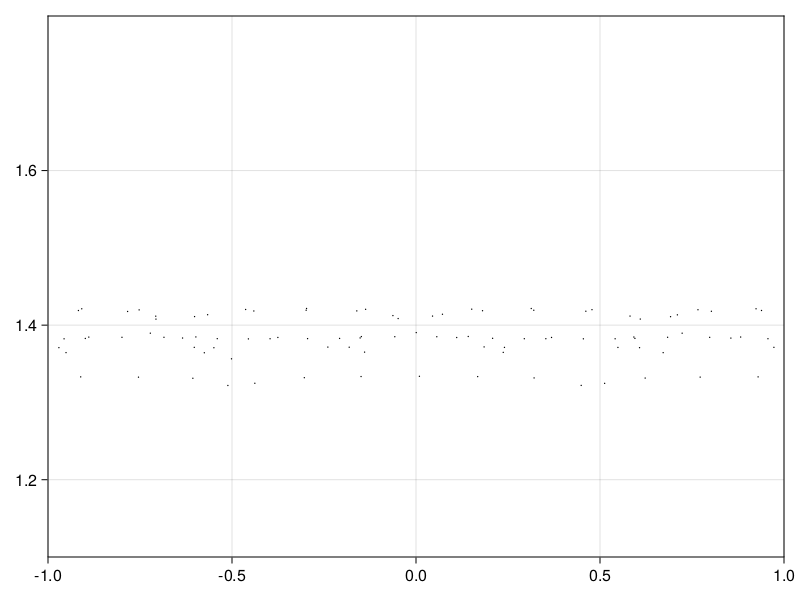

In [5]:
using CairoMakie

fig = Figure()
ax = Axis(fig[1, 1])
scatter!(theta[2:end-1] / pi, a[2:end-1], color=:black, markersize=2)
xlims!(-1, 1)
ylims!(1.1, 1.8)
# ylims!(0.4, 0.65)
fig

# 2. `EnsembleProblem`による並列計算の実行

In [6]:
using Distributed
using DifferentialEquations

addprocs(exeflags="--project=$(Base.active_project())")
@everywhere using DifferentialEquations
@everywhere using LinearAlgebra

@everywhere t_fin = 1000
@everywhere μ = 0.01215058426994 #5.667e-5 #0.01215058426994
num_trj = 10000

10000

In [7]:
tspan = (0.0, t_fin)
prob = ODEProblem(eom_pcrtbp!, x0, tspan, μ)

# Definition of Equation of Motion of Planar CRTBP
@everywhere function eom_pcrtbp!(dx, x, μ, t)
    # Preparation
    r1 = x[1:2] + [μ, 0.0]
    r2 = x[1:2] - [1.0 - μ, 0.0]
    a_cori = [2.0x[4], -2.0x[3]]
    a_cf = [x[1], x[2]]
    # dx/dt
    dx[1:2] = x[3:4]
    dx[3:4] = -(1.0 - μ) * r1 / (norm(r1)^3) - μ * r2 / (norm(r2)^3) + a_cori + a_cf
end

@everywhere function prob_func(prob, i, repeat)
    jacobi_constant = 3.0
    μ = 0.01215058426994 #5.667e-5 #0.01215058426994
    qx0 = 1.01 + 6.0e-2*rand()
    py0 = sqrt(-jacobi_constant + qx0^2 + 2.0 * (1.0 - μ) / abs(qx0 + μ) + 2.0 * μ / abs(qx0 - 1.0 + μ) + μ*(1.0-μ))
    x0 = [qx0, 1.e-6, 0.0, py0]
    remake(prob, u0=x0)
end

@everywhere function condition(x, t, integrator) # Event when event_f(u,t) == 0
    r1_vec = x[1:2] + [μ,0.0]
    return r1_vec ⋅ x[3:4]
end

@everywhere function affect!(integrator)
    nothing
end

cb = ContinuousCallback(condition, nothing, affect!, save_positions=(true, false))

ensemble_prob = EnsembleProblem(prob, prob_func=prob_func)
sim = solve(ensemble_prob, Vern7(), EnsembleDistributed(), trajectories=num_trj, callback=cb, saveat=t_fin)

EnsembleSolution Solution of length 10000 with uType:
ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Float64, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Float64, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Float64, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Float64, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{

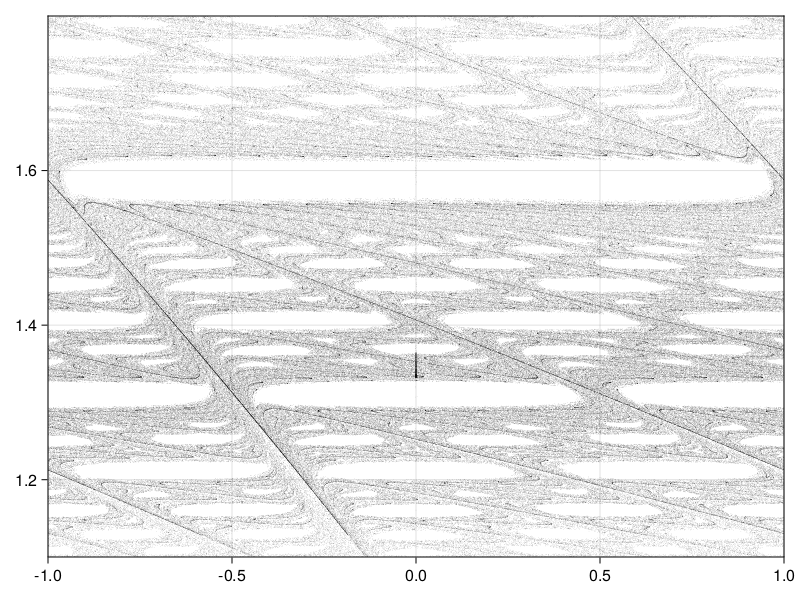

In [8]:
using CairoMakie

fig = Figure()
ax = Axis(fig[1, 1])

for n = 1:num_trj
    x_all = hcat(sim[n].u...)'

    r_1 = sqrt.((x_all[:, 1] .+ μ) .^ 2 + x_all[:, 2] .^ 2)
    k_ene = 0.5 * ((x_all[:, 3] - x_all[:, 2]) .^ 2 + (x_all[:, 4] + x_all[:, 1] .+ μ) .^ 2)
    a = -0.5 ./ (k_ene .- 1.0 ./ r_1)
    theta = atan.(x_all[:, 2],x_all[:, 1] .+ μ)

    scatter!(theta[2:end-1] / pi, a[2:end-1], color=:black, markersize=0.5)
end

xlims!(-1.0, 1.0)
# ylims!(1.1, 1.8)
ylims!(0.4, 0.65)
fig

In [9]:
# Negative Time Propagation
@everywhere t_fin = -1000
tspan = (0.0, t_fin)
prob = ODEProblem(eom_pcrtbp!, x0, tspan, μ)

# Definition of Equation of Motion of Planar CRTBP
@everywhere function eom_pcrtbp!(dx, x, μ, t)
    # Preparation
    r1 = x[1:2] + [μ, 0.0]
    r2 = x[1:2] - [1.0 - μ, 0.0]
    a_cori = [2.0x[4], -2.0x[3]]
    a_cf = [x[1], x[2]]
    # dx/dt
    dx[1:2] = x[3:4]
    dx[3:4] = -(1.0 - μ) * r1 / (norm(r1)^3) - μ * r2 / (norm(r2)^3) + a_cori + a_cf
end

@everywhere function prob_func(prob, i, repeat)
    jacobi_constant = 3.0
    μ = 0.01215058426994 #5.667e-5 #0.01215058426994
    qx0 = 1.01 + 6.0e-2*rand()
    py0 = sqrt(-jacobi_constant + qx0^2 + 2.0 * (1.0 - μ) / abs(qx0 + μ) + 2.0 * μ / abs(qx0 - 1.0 + μ) + μ*(1.0-μ))
    x0 = [qx0, 1.e-6, 0.0, py0]
    remake(prob, u0=x0)
end

@everywhere function condition(x, t, integrator) # Event when event_f(u,t) == 0
    r1_vec = x[1:2] + [μ,0.0]
    return r1_vec ⋅ x[3:4]
end

@everywhere function affect!(integrator)
    nothing
end

cb = ContinuousCallback(condition, affect!, nothing, save_positions=(true, false))

ensemble_prob = EnsembleProblem(prob, prob_func=prob_func)
sim = solve(ensemble_prob, Vern7(), EnsembleDistributed(), trajectories=num_trj, callback=cb, saveat=t_fin)

EnsembleSolution Solution of length 10000 with uType:
ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Float64, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Float64, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Float64, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Float64, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{

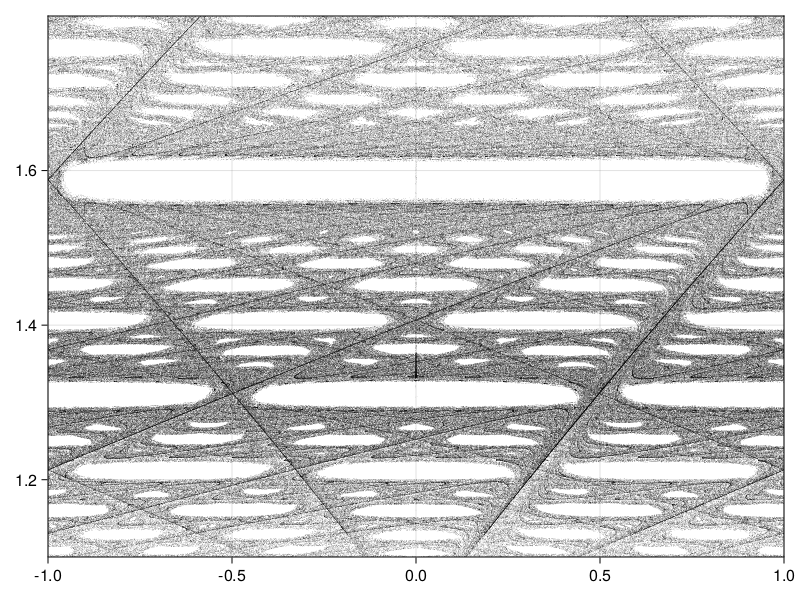

In [11]:
for n = 1:num_trj
    x_all = hcat(sim[n].u...)'

    r_1 = sqrt.((x_all[:, 1] .+ μ) .^ 2 + x_all[:, 2] .^ 2)
    k_ene = 0.5 * ((x_all[:, 3] - x_all[:, 2]) .^ 2 + (x_all[:, 4] + x_all[:, 1] .+ μ) .^ 2)
    a = -0.5 ./ (k_ene .- 1.0 ./ r_1)
    theta = atan.(x_all[:, 2],x_all[:, 1] .+ μ)

    scatter!(theta[2:end-1] / pi, a[2:end-1], color=:black, markersize=0.5)
end

xlims!(-1.0, 1.0)
# ylims!(1.1, 1.8)
ylims!(0.4, 0.65)
fig